In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
# Load dataset from Google Drive
file_path = '/content/drive/MyDrive/Dataset/Breast Cancer Wisconsin (Diagnostic).csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [7]:
# Drop unnecessary columns
data = data.drop(columns=['id', 'Unnamed: 32'])

# Encode the 'diagnosis' column (M -> 1, B -> 0)
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])  # M = 1, B = 0


In [8]:
# Separate features and target variable
X = data.drop(columns=['diagnosis'])  # Features
y = data['diagnosis']                # Target


In [9]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [11]:
# Train SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [12]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


Accuracy: 97.66%
Confusion Matrix:
 [[106   2]
 [  2  61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



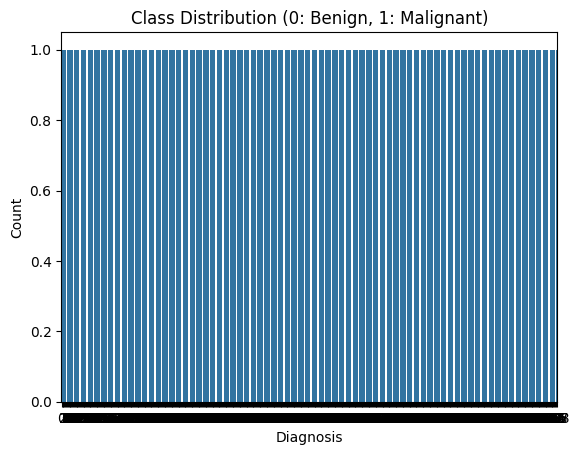

In [15]:
# Class distribution
sns.countplot(data['diagnosis'])
plt.title("Class Distribution (0: Benign, 1: Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


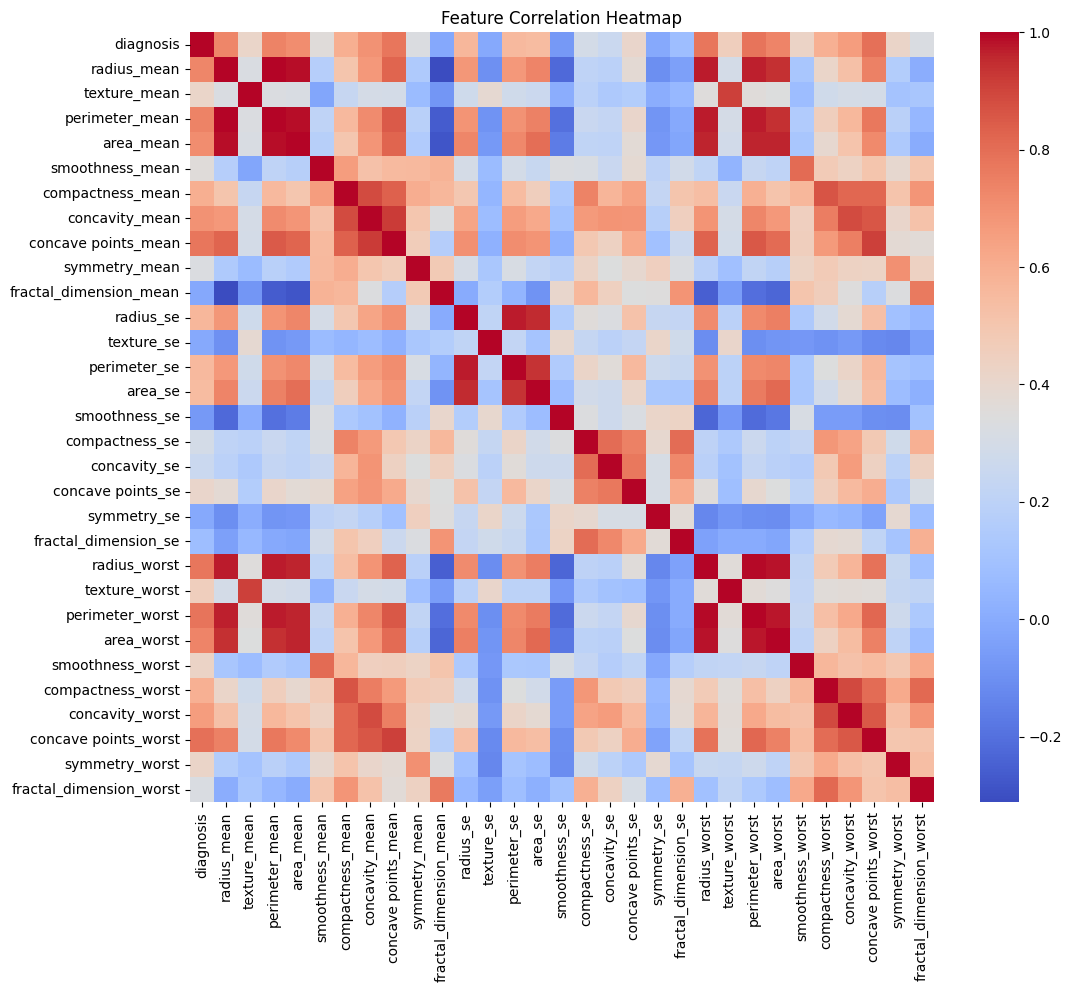

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


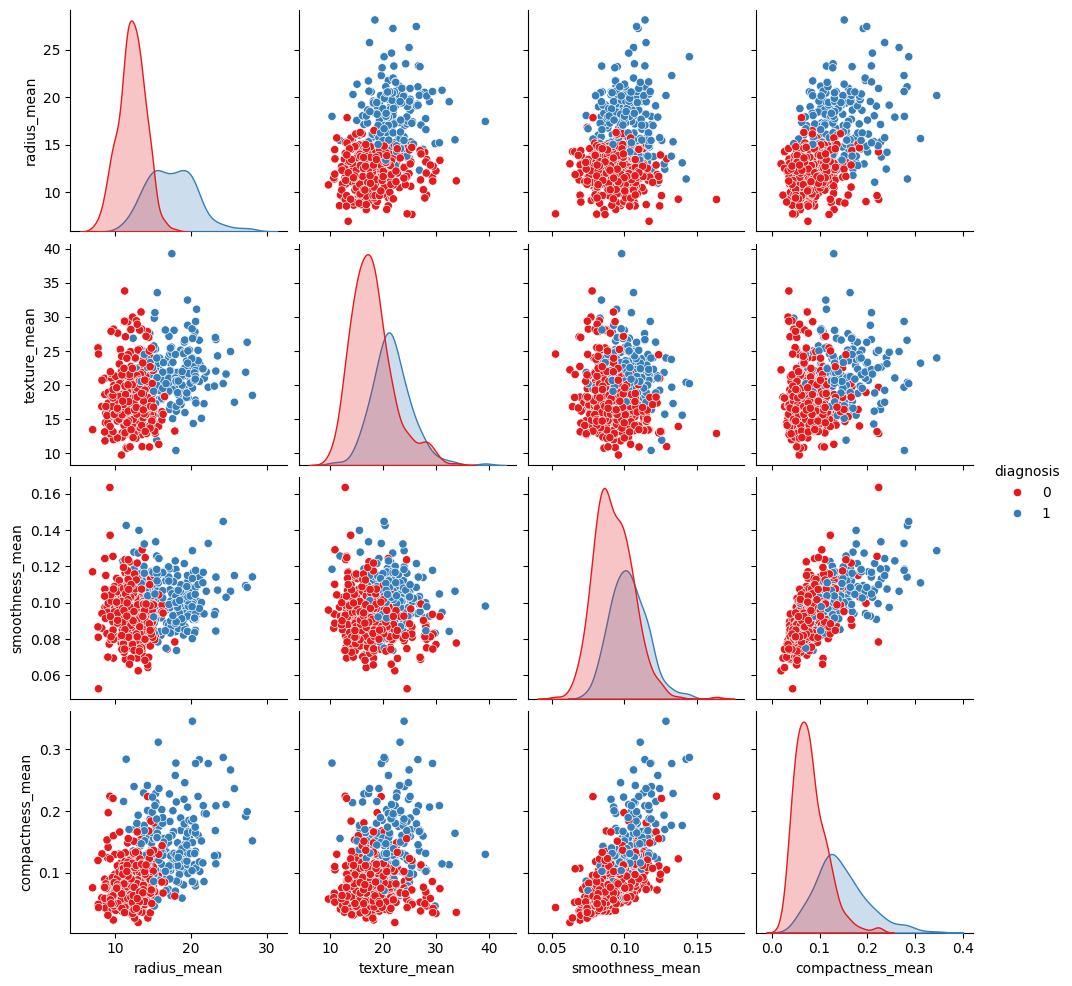

In [17]:
# Pairplot for selected features
selected_features = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'diagnosis']
sns.pairplot(data[selected_features], hue="diagnosis", palette="Set1")
plt.show()


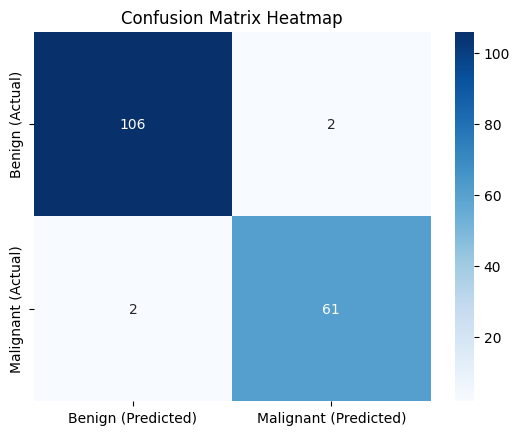

In [19]:
# 5. Confusion Matrix Heatmap
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Benign (Actual)", "Malignant (Actual)"],
                              columns=["Benign (Predicted)", "Malignant (Predicted)"])
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.show()